### 평균 경로 길이(평균 최단 경로 길이) 계산

In [1]:
import networkx as nx

1

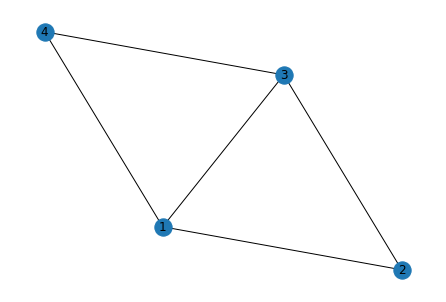

In [10]:
# 가중치가 없는 네트워크

g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
g.add_edge(3,4)
nx.draw(g, with_labels = True)
nx.radius(g)

In [48]:
nx.has_path(g,3,4)

True

In [47]:
list(nx.all_simple_paths(g,3,4)) # 노드 3에서 노드 4로 가는 모든 경로

[[3, 2, 1, 4], [3, 1, 4], [3, 4]]

In [46]:
nx.shortest_path(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로

[3, 4]

In [45]:
nx.shortest_path_length(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로 길이

1

In [44]:
nx.shortest_path(g) # 모든 경로 확인

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 4]},
 4: {4: [4], 1: [4, 1], 3: [4, 3], 2: [4, 1, 2]}}

In [14]:
nx.shortest_path_length(g)

<generator object all_pairs_shortest_path_length at 0x0000025E20265580>

In [43]:
nx.average_shortest_path_length(g) # g의 평균 최단 경로 길이

1.1666666666666667

-0.40824829046386546

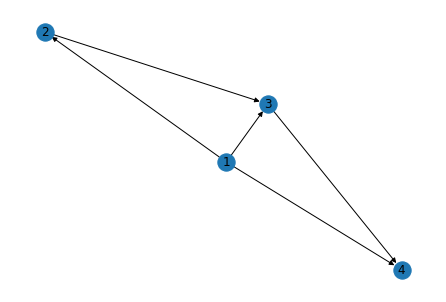

In [72]:
# 가중치가 있는 방향성 네트워크

w = nx.DiGraph() 
w.add_nodes_from([1,2,3,4])
w.add_edge(1,2, weight = 3)
w.add_edge(2,3, weight = 1) 
w.add_edge(1,3, weight = 5)
w.add_edge(1,4, weight = 4)
w.add_edge(3,4, weight = 2)
nx.draw(w, with_labels = True )
nx.degree_assortativity_coefficient(w) # 동류성 계수

In [35]:
nx.has_path(w,3,4)

False

In [41]:
print(nx.shortest_path_length(w,2,4))
print(nx.shortest_path_length(w,2,4,'weight'))

2
3


In [36]:
nx.average_shortest_path_length(w) 

0.3333333333333333

-1.0


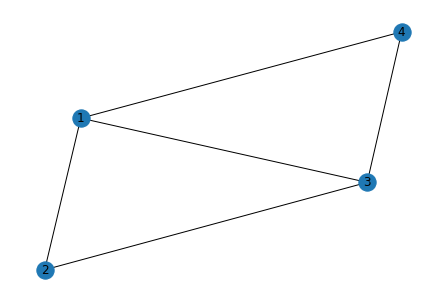

In [82]:
import scipy.stats

nx.draw(g, with_labels = True)
knn_dict = nx.average_degree_connectivity(g)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

In [77]:
nx.draw(w, with_labels = True)
knn_dict = nx.average_degree_connectivity(w)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

1.0

1.0

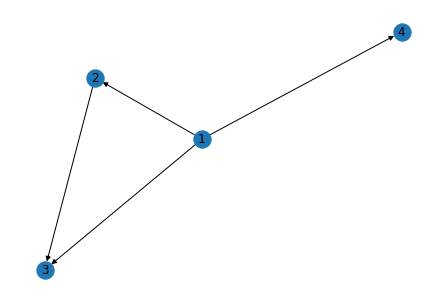

In [6]:
# 가중치가 있는 방향성 네트워크

f = nx.DiGraph() 
f.add_nodes_from([1,2,3,4])
f.add_edge(1,2, weight = 3)
f.add_edge(2,3, weight = 1) 
f.add_edge(1,3, weight = 5)
f.add_edge(1,4, weight = 4)
nx.draw(f, with_labels = True)
nx.average_shortest_path_length(f,'weight')

1